In [58]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
from src.utils import *
import pickle
import scipy as sio
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import os
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
with open('/home/diya/Documents/rat-fes/data/pickles/3-meepo_regular_923__session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1 = pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/3-results-injured-meepolemons1004_meepo_session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2 = pickle.load(inp)

In [60]:
h, cp1_vaf, nada, nadax = cp1.decode_angles()
nadaa, cp2_vaf, nada, nadax = cp2.decode_angles()

print(np.average(cp1_vaf, 1))
print(np.average(cp2_vaf, 1))

[0.15  0.397 0.074 0.427 0.34  0.107 0.347]
[-0.026 -0.023 -0.032 -0.014  0.005 -0.011 -0.005]


In [97]:
my_cca = CCAProcessor(cp1, cp2, limbfoot_angle=6, align=0)

should be good to align
(1450, 32)
(1450, 7)
(1450, 32)
(1450, 7)


In [109]:
transformer, wpost, ywpost = my_cca.apply_ridge()

/home/diya/anaconda3/envs/rat-fes/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:252: FutureWarning: As of version 0.24, n_components(1450) should be in [1, min(n_features, n_samples, n_targets)] = [1, 32]. n_components=32 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  FutureWarning,


(1450, 32) (1450, 7)
initial_scoring is : -0.07
new_scoring is: 0.25


In [104]:
proc_x = my_cca.data['cp2']['proc_x']
proc_y = my_cca.data['cp2']['proc_y']

scaler = StandardScaler()
sca_proc_x = scaler.fit_transform(proc_x)

sca_proc_x_format, proc_y_format = format_data(sca_proc_x, proc_y)

raw_x = cp2.data['rates']
raw_y = cp2.data['angles']

aligned_raw_x = []
scaler.fit(raw_x[0])
for x in raw_x:
    temp_x = scaler.transform(x)
    aligned_raw_x.append(my_cca.quick_cca(temp_x, transformer))
    

ValueError: X has 32 features, but CCA is expecting 8 features as input.

0.06


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
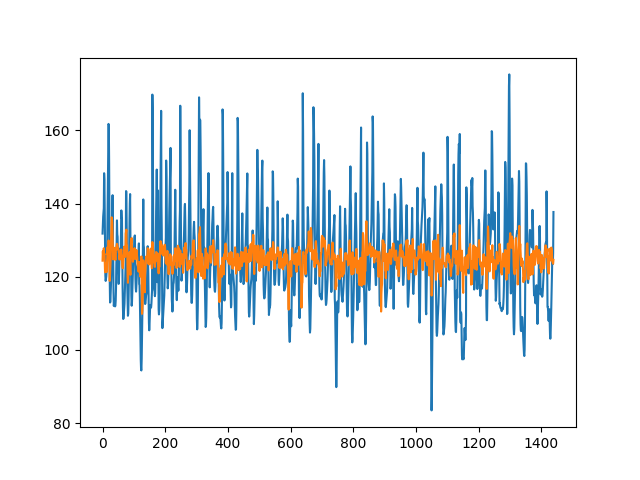

In [105]:
ywpost_adjusted = ywpost + (np.mean(proc_y_format[:,6]) - np.mean(ywpost[:,6]))
fig, ax = plt.subplots()
ax.plot(proc_y_format[:,6])
ax.plot(ywpost_adjusted[:,6])

print(vaf(proc_y_format[:,6], ywpost_adjusted[:,6]))



In [92]:
aligned_raw_x_format, raw_y_format = my_cca.cp2.stitch_and_format(aligned_raw_x, raw_y)

-0.14


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
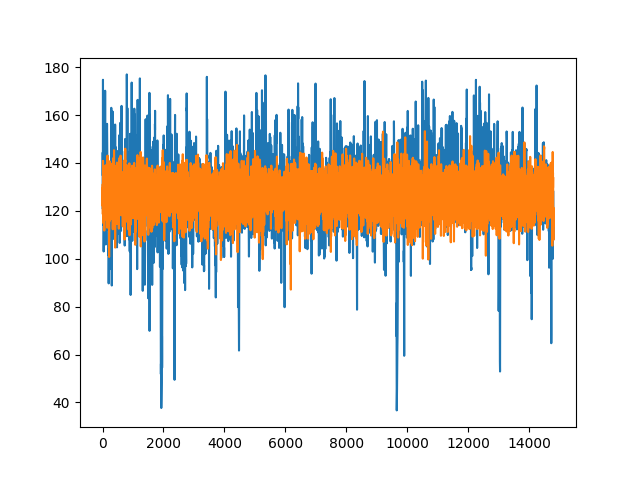

In [93]:
predic = test_wiener_filter(aligned_raw_x_format, wpost)
fig, ax = plt.subplots()
predic_adjusted = predic + (np.mean(raw_y_format[:,6]) - np.mean(predic[:,6]))
ax.plot(raw_y_format[:,6])
ax.plot(predic_adjusted[:,6])

print(vaf(raw_y_format[:,6], predic_adjusted[:,6]))

In [47]:
kin1 = my_cca.data['cp1']['proc_y']
kin2 = my_cca.data['cp2']['proc_y']

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
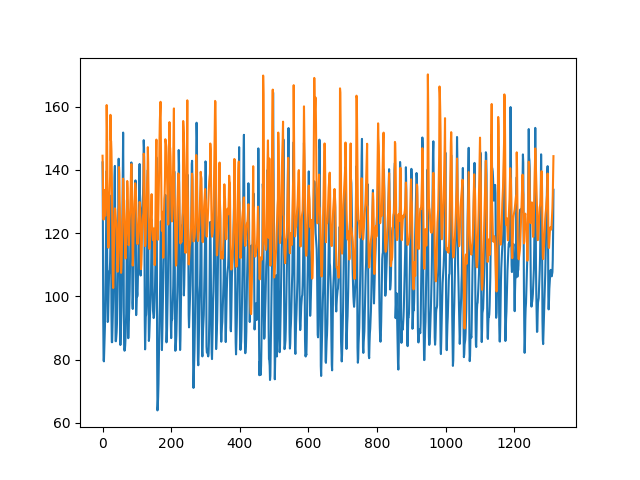

In [48]:
fig, ax=plt.subplots()
ax.plot(kin1[:,6])
ax.plot(kin2[:,6])

In [52]:
diya.shape

(1315, 32)

In [58]:
diya_format, y_format = format_data(diya, kin2)

In [59]:
predic = test_wiener_filter(diya_format, h)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
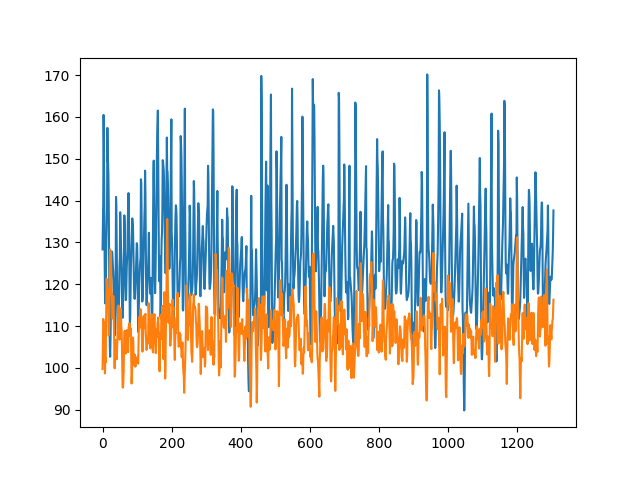

In [60]:
fig, ax = plt.subplots()
ax.plot(y_format[:,6])
ax.plot(predic[:,6])